In [2]:
!pip install deepface

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 25.8 MB/s eta 0:00:00


In [4]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

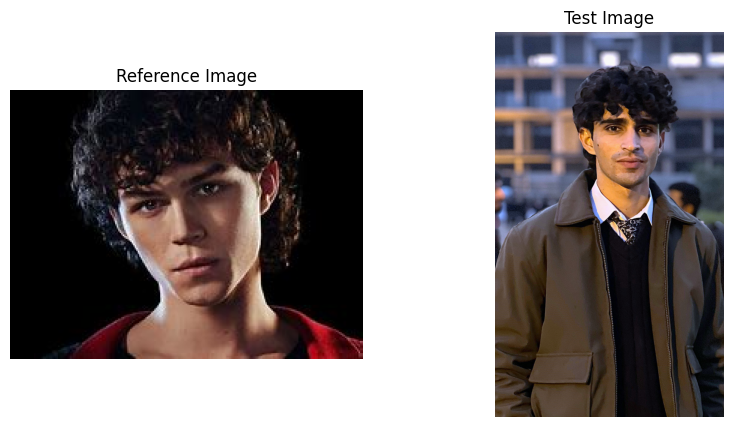

In [7]:
# Load reference image (the person to recognize)
img_path1 = '/content/lucien.jpeg'

# Load test image (the face to be identified)
img_path2 = '/content/cv-image3.0.JPG'

# Display the images using Matplotlib
img1 = cv2.imread(img_path1)
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread(img_path2)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img1_rgb)
axes[0].set_title("Reference Image")
axes[1].imshow(img2_rgb)
axes[1].set_title("Test Image")
axes[0].axis('off')
axes[1].axis('off')
plt.show()


In [17]:
models = [
  "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",
  "DeepFace",
  "DeepID",
  "ArcFace",
  "Dlib",
  "SFace",
  "GhostFaceNet",
]

backends = [
  'opencv',
  'ssd',
  'dlib',
  'mtcnn',
  'fastmtcnn',
  'retinaface',
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]

metrics = ["cosine", "euclidean", "euclidean_l2"]

alignment_modes = [True, False]



# Face Embeddings

In [10]:
#embeddings
embedding_objs1 = DeepFace.represent(
  img_path1,
  detector_backend = backends[7],
  align = alignment_modes[0],
)

25-01-25 17:41:24 - Downloading Yolo weights from https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb to /root/.deepface/weights/yolov8n-face.pt...


Downloading...
From: https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb
To: /root/.deepface/weights/yolov8n-face.pt
100%|██████████| 6.39M/6.39M [00:00<00:00, 34.8MB/s]


25-01-25 17:41:28 - Yolo model is just downloaded to yolov8n-face.pt


In [11]:
#embeddings
embedding_objs2 = DeepFace.represent(
  img_path2,
  detector_backend = backends[7],
  align = alignment_modes[0],
)

In [12]:
# Print out the embeddings (the face vector representation)
print("Embeddings for the image:", embedding_objs1)

Embeddings for the image: [{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017557048621613548, 0.0, 0.0, 0.0, 0.007334098359265451, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.009884389524967634, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.023365187391735587, 0.005540659293262483, 0.0, 0.0, 0.0, 0.02949759847153148, 0.0, 0.0025593800919349436, 0.08211960432125079, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015773721715634497, 0.0, 0.0, 0.0, 0.0, 0.013095342960063204, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04345350601527685, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006729545045079345, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017223580809614607, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.030729958315939075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.010799043111166884, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [13]:
# Print out the embeddings (the face vector representation)
print("Embeddings for the image:", embedding_objs2)

Embeddings for the image: [{'embedding': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.017263489578768162, 0.0004266427760771025, 0.0, 0.0, 0.0, 0.043636701754553094, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05881582899149087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06199115647496508, 0.0, 0.0, 0.008273521194414749, 0.0, 0.015542280280226651, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02668484099760404, 0.1636589094388907, 0.0, 0.0, 0.0, 0.0, 0.009622478315699528, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026308557273366503, 0.0, 0.0126582527118404, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04357377658849291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09703341688638778, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

# Verification
(Same person in both images or not)

In [58]:
# Verify if both images belong to the same person
result = DeepFace.verify(img_path1, img_path2, model_name = models[2], detector_backend = backends[7], distance_metric = metrics[1])

In [59]:
# Print the result
print("Are these two images of the same person?", result)

Are these two images of the same person? {'verified': False, 'distance': 25.793138968197542, 'threshold': 23.56, 'model': 'Facenet512', 'detector_backend': 'yolov8', 'similarity_metric': 'euclidean', 'facial_areas': {'img1': {'x': 70, 'y': 27, 'w': 95, 'h': 115, 'left_eye': (131, 66), 'right_eye': (94, 74)}, 'img2': {'x': 1350, 'y': 1294, 'w': 238, 'h': 294, 'left_eye': (-933, -1572), 'right_eye': (-933, -1572)}}, 'time': 3.27}


# Analysis
Age, Gender, Race and Emotion

In [28]:
objs = DeepFace.analyze(
  img_path1,
  actions = ['age', 'gender', 'race', 'emotion'],
  detector_backend = backends[7]
)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 44.84it/s]


In [29]:
# Extract and print the required fields
age = objs[0]['age']
gender = objs[0]['dominant_gender']
race = objs[0]['dominant_race']
dominant_emotion = objs[0]['dominant_emotion']

# Print the extracted information
print(f"Age: {age}")
print(f"Gender: {gender}")
print(f"Race: {race}")
print(f"Dominant Emotion: {dominant_emotion}")

Age: 27
Gender: Man
Race: white
Dominant Emotion: neutral


Face Detection & Extraction

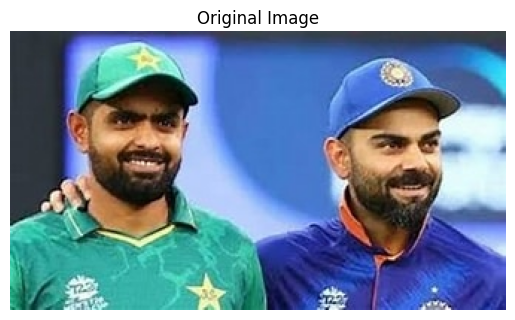

In [44]:
img_path3 = '/content/babar-kohli.jpeg'
# Display the images using Matplotlib
img3 = cv2.imread(img_path3)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.title('Original Image')
plt.imshow(img3_rgb)
plt.show()

In [39]:
#face detection and alignment
face_objs = DeepFace.extract_faces(
  img_path3,
  detector_backend = backends[7],
  align = alignment_modes[0],
)

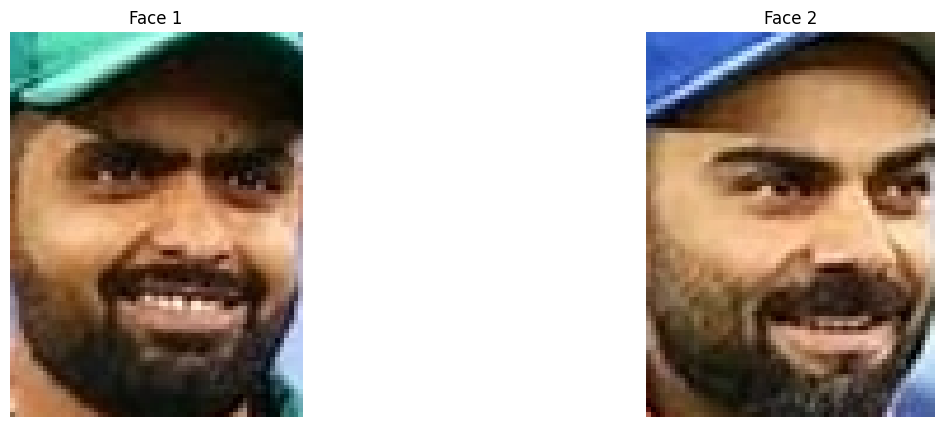

In [45]:
# Display the extracted faces
fig, axes = plt.subplots(1, len(face_objs), figsize=(15, 5))
if len(face_objs) == 1:
    axes = [axes]  # Ensure axes is always iterable

for i, face in enumerate(face_objs):
    # The "face" object contains the cropped face as an array
    face_img = face["face"]
    axes[i].imshow(face_img)
    axes[i].axis("off")
    axes[i].set_title(f"Face {i+1}")


plt.show()

# Realtime-Emotion Detection

In [60]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({video: true});

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

try:
    while True:
        # Capture a photo
        print("Capturing photo...")
        filename = take_photo()
        print(f"Photo saved to {filename}")

        # Load the photo using OpenCV
        img = cv2.imread(filename)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Perform analysis using DeepFace
        try:
            analysis = DeepFace.analyze(img_path=filename, actions=['age', 'gender', 'emotion', 'race'])

            # Print analysis results
            print("Analysis Results:")
            print(f"Age: {analysis[0]['age']}")
            print(f"Gender: {analysis[0]['dominant_gender']}")
            print(f"Emotion: {analysis[0]['dominant_emotion']}")
            print(f"Race: {analysis[0]['dominant_race']}")

        except Exception as e:
            print(f"Error during analysis: {e}")


        # Option to exit the loop
        cont = input("Do you want to capture another photo? (yes/no): ").strip().lower()
        if cont != "yes":
            break

except Exception as err:
    print("An error occurred: ", err)

Capturing photo...


<IPython.core.display.Javascript object>

Photo saved to photo.jpg


Action: race: 100%|██████████| 4/4 [00:00<00:00, 47.26it/s]


Analysis Results:
Age: 31
Gender: Man
Emotion: fear
Race: middle eastern
Do you want to capture another photo? (yes/no): no
